In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [309]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

In [310]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [311]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [312]:
tristates = [9,34,36]

In [313]:
# your code here
df = df[df['_STATE'].isin(tristates)]

Now check to see how large our subset df.

In [314]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [315]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [316]:
#your code here

zero_dict = {88: 0,
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [317]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [318]:
# descriptive statistics
# matplotlib
df['PHYSHLTH'].describe()


count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([    0. ,  3374.7,  6749.4, 10124.1, 13498.8, 16873.5, 20248.2,
        23622.9, 26997.6, 30372.3, 33747. ]),
 <a list of 10 Patch objects>)

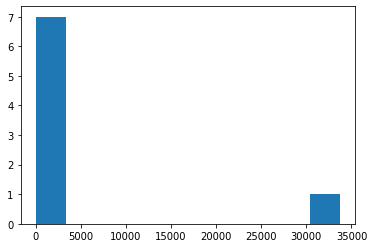

In [319]:
# graphic showing those descriptive stats
plt.hist(df['PHYSHLTH'].describe())

(array([2.1296e+04, 1.5380e+03, 1.9930e+03, 1.1870e+03, 6.2200e+02,
        1.0920e+03, 1.8700e+02, 6.4100e+02, 9.9000e+01, 1.5000e+01,
        7.5100e+02, 8.0000e+00, 6.9000e+01, 1.0000e+01, 3.2600e+02,
        6.4000e+02, 1.6000e+01, 1.5000e+01, 1.9000e+01, 1.0000e+01,
        4.0200e+02, 7.0000e+01, 1.2000e+01, 4.0000e+00, 7.0000e+00,
        1.5900e+02, 7.0000e+00, 2.2000e+01, 5.7000e+01, 2.4730e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

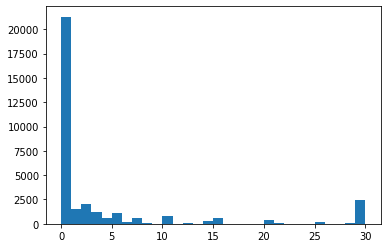

In [320]:
# graphic showing the distribution of data
plt.hist(df['PHYSHLTH'], bins=30)

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [321]:
# code to calculate the average number of sick days by state
# groupby

state = df.groupby('_STATE')['PHYSHLTH'].mean()
state

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

<BarContainer object of 3 artists>

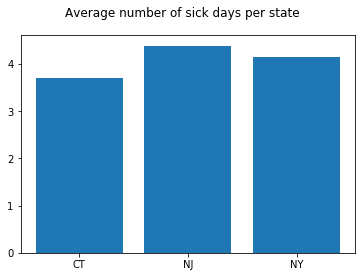

In [322]:
# code to graph those averages using matplotlib
x = ['CT', 'NJ', 'NY']
plt.suptitle('Average number of sick days per state')
plt.bar(x, state.values)

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [376]:
# code to create new colum for chronically sick
df['chronically_sick'] = df['PHYSHLTH'] >= 10
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chronically_sick
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,False
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,False
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,False
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,False
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,False


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [324]:
# code to calculate averages per state
sick = df.groupby('_STATE')['chronically_sick'].mean()
sick_percents = round(sick * 100, 2)
sick_percents

_STATE
9.0     13.31
34.0    15.86
36.0    14.78
Name: chronically_sick, dtype: float64

<BarContainer object of 3 artists>

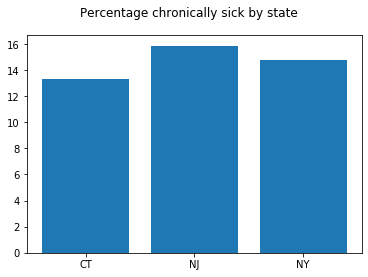

In [325]:
# create graphic to compare chronically sick by state
plt.suptitle('Percentage chronically sick by state')
plt.bar(x, sick_percents)

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [326]:
df['SMOKDAY2'].describe()

count    13783.000000
mean         2.525720
std          0.853626
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: SMOKDAY2, dtype: float64

In [327]:
df['SMOKDAY2'].unique()

array([nan,  3.,  1.,  2.,  9.,  7.])

In [328]:
smoke_dict = {7: np.nan,
            9: np.nan}

df['SMOKDAY2'] = df['SMOKDAY2'].replace(smoke_dict)

In [329]:
df['SMOKDAY2'].value_counts()

3.0    9703
1.0    2676
2.0    1371
Name: SMOKDAY2, dtype: int64

<BarContainer object of 3 artists>

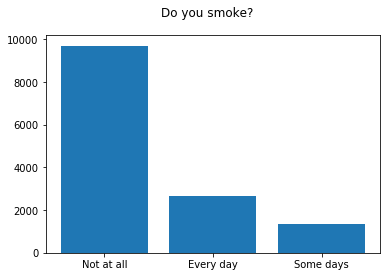

In [330]:
answers = ['Not at all', 'Every day', 'Some days']
plt.suptitle('Do you smoke?')
plt.bar(answers, df['SMOKDAY2'].value_counts().values)

In [331]:
smokers_by_state = df.groupby('_STATE')['SMOKDAY2'].value_counts()
smokers_by_state.values

array([3218,  713,  351, 3329,  927,  484, 3156, 1036,  536])

<BarContainer object of 9 artists>

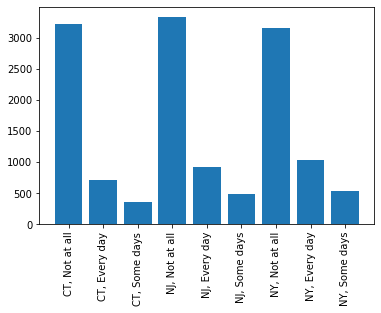

In [332]:
x_smokers = []

for state_name in x:
   x_smokers.append(state_name + ", " + answers[0])
   x_smokers.append(state_name + ", " + answers[1])
   x_smokers.append(state_name + ", " + answers[2])

plt.xticks(rotation="vertical")
plt.bar(x_smokers, smokers_by_state.values)

In [333]:
sick_smokers = df.groupby(['_STATE', 'chronically_sick'])['SMOKDAY2'].value_counts('percent')
sick_smokers_percent = round(sick_smokers * 100, 2)
sick_smokers_percent.values

array([77.49, 15.25,  7.26, 64.02, 23.32, 12.67, 71.76, 18.22, 10.02,
       64.2 , 24.84, 10.96, 68.45, 20.74, 10.81, 59.63, 26.84, 13.53])

In [334]:
chronically_sick_labels = []

a = "Chronically ill, "
b = "Not chronically ill, "

for state in x:
    chronically_sick_labels.append(b + state + ", " + answers[0])
    chronically_sick_labels.append(b + state + ", " + answers[1])
    chronically_sick_labels.append(b + state + ", " + answers[2])
    chronically_sick_labels.append(a + state + ", " + answers[0])
    chronically_sick_labels.append(a + state + ", " + answers[1])
    chronically_sick_labels.append(a + state + ", " + answers[2])
    
chronically_sick_labels

['Not chronically ill, CT, Not at all',
 'Not chronically ill, CT, Every day',
 'Not chronically ill, CT, Some days',
 'Chronically ill, CT, Not at all',
 'Chronically ill, CT, Every day',
 'Chronically ill, CT, Some days',
 'Not chronically ill, NJ, Not at all',
 'Not chronically ill, NJ, Every day',
 'Not chronically ill, NJ, Some days',
 'Chronically ill, NJ, Not at all',
 'Chronically ill, NJ, Every day',
 'Chronically ill, NJ, Some days',
 'Not chronically ill, NY, Not at all',
 'Not chronically ill, NY, Every day',
 'Not chronically ill, NY, Some days',
 'Chronically ill, NY, Not at all',
 'Chronically ill, NY, Every day',
 'Chronically ill, NY, Some days']

<BarContainer object of 18 artists>

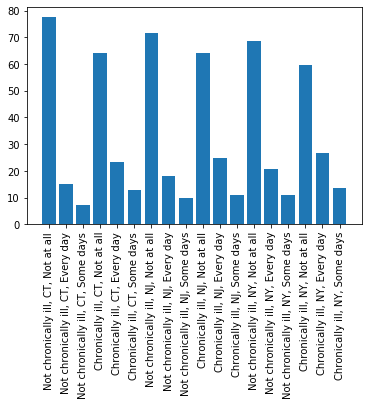

In [335]:
plt.xticks(rotation='vertical')
plt.bar(chronically_sick_labels, sick_smokers_percent.values)

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [336]:
df['ALCDAY5'].unique()

array([101., 230., 888., 103., 104., 204., 205., 107., 215., 202., 201.,
       220., 203., 214., 207., 102., 210.,  nan, 208., 105., 229., 227.,
       226., 216., 206., 222., 999., 777., 225., 228., 213., 212., 224.,
       106., 218., 217., 221., 211., 209., 219., 223.])

In [337]:
alcday5_dict = {999: np.nan,
                888: 0,
               777: np.nan}

for i in range(101, 108):
    alcday5_dict.update({i: round(((i-100)*4.28), 2)})

for i in range(201, 231):
    alcday5_dict.update({i:(i-200)})

alcday5_dict

df['ALCDAY5'] = df['ALCDAY5'].replace(alcday5_dict)

In [338]:
df['ALCDAY5'].describe()

count    32212.000000
mean         5.428987
std          8.381909
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: ALCDAY5, dtype: float64

(array([1.3043e+04, 3.0270e+03, 2.3240e+03, 1.3500e+03, 2.7400e+03,
        1.1560e+03, 3.8900e+02, 2.7800e+02, 1.6010e+03, 2.8000e+01,
        8.4000e+02, 1.0000e+01, 9.2600e+02, 1.1000e+01, 5.3000e+01,
        5.9000e+02, 1.5000e+01, 3.9300e+02, 1.9000e+01, 1.0000e+00,
        6.5000e+02, 3.6500e+02, 1.3000e+01, 2.0000e+00, 1.4000e+01,
        3.7400e+02, 1.5000e+01, 2.4000e+01, 5.6000e+01, 1.9050e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <a list of 30 Patch objects>)

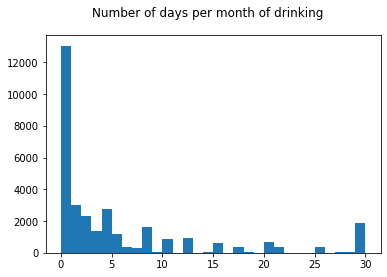

In [339]:
plt.suptitle('Number of days per month of drinking')
plt.hist(df['ALCDAY5'], bins=30)

In [340]:
df['_STATE'].values

array([ 9.,  9.,  9., ..., 36., 36., 36.])

In [341]:
alc_by_state = df.groupby(['ALCDAY5'])['_STATE'].value_counts()

df_alc_by_state = pd.DataFrame(alc_by_state)

df_alc_by_state = df_alc_by_state.rename(columns={'_STATE': 'COUNT'})

df_alc_by_state = df_alc_by_state.reset_index()

df_alc_by_state.head()

,ALCDAY5,_STATE,COUNT
0,0.0,36.0,4741
1,0.0,34.0,4702
2,0.0,9.0,3600
3,1.0,34.0,1065
4,1.0,36.0,1046


<BarContainer object of 111 artists>

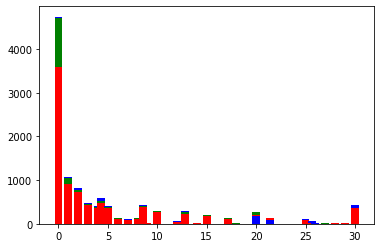

In [358]:
plt.bar(df_alc_by_state['ALCDAY5'], df_alc_by_state['COUNT'], color=['b', 'g', 'r'])

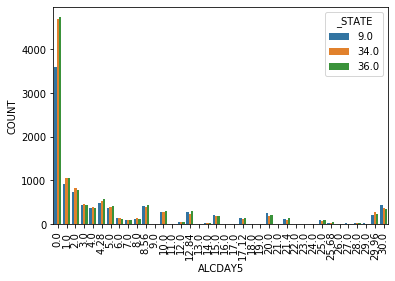

In [374]:
plt.xticks(df_alc_by_state['ALCDAY5'], rotation=90)
plot = sns.barplot(df_alc_by_state['ALCDAY5'], df_alc_by_state['COUNT'], hue=df_alc_by_state['_STATE'])


## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [343]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  